In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
global_co2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/co2_emissions.csv")
global_co2.columns = ['country','1990','2005','2017','2021']

In [3]:
%load_ext google.colab.data_table

In [4]:
global_co2

,country,1990,2005,2017,2021
0,World,22674.120,30049.810,37077.400,37857.58
1,World – International Aviation,258.941,422.777,543.381,NaN
2,World – International Shipping,371.804,572.169,677.248,NaN
3,Afghanistan,2.546,1.063,11.422,8.35
4,Albania,6.583,4.196,5.026,4.59
...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,321.41
208,Western Sahara,0.144,0.227,0.276,0.24
209,Yemen,6.887,21.768,12.503,12.05
210,Zambia,2.955,2.457,4.967,7.01


In [5]:
not_countries = ['World','World – International Aviation','World – International Shipping','European Union']
global_co2_countries = global_co2.loc[~global_co2['country'].isin(not_countries)]
global_co2_countries


,country,1990,2005,2017,2021
3,Afghanistan,2.546,1.063,11.422,8.35
4,Albania,6.583,4.196,5.026,4.59
5,Algeria,65.677,98.197,159.929,173.00
6,Angola,5.851,15.975,30.876,24.45
7,Anguilla,0.006,0.014,0.028,0.03
...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,321.41
208,Western Sahara,0.144,0.227,0.276,0.24
209,Yemen,6.887,21.768,12.503,12.05
210,Zambia,2.955,2.457,4.967,7.01


In [6]:
biggest_co2_producers = global_co2_countries.sort_values(['2021'], ascending=False, ignore_index=True).iloc[0:5]
biggest_co2_producers
# global_co2_biggest_producers = global_co2_countries.loc[global_co2_countries.country.isin(biggest_co2_producers)]
# global_co2_biggest_producers

,country,1990,2005,2017,2021
0,China,2397.050,6263.06,10877.22,12466.32
1,United States,5085.900,5971.57,5107.39,4752.08
2,India,605.968,1210.75,2454.77,2648.78
3,Russia,2378.920,1733.95,1764.87,1942.54
4,Japan,1149.400,1276.86,1320.78,1084.69


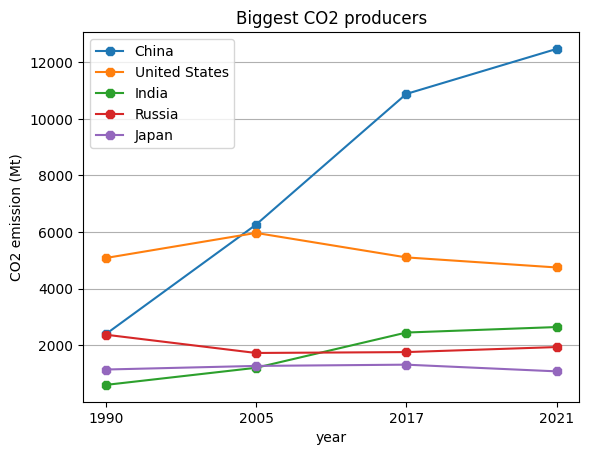

In [7]:
fig, ax = plt.subplots()
years = biggest_co2_producers.columns[1:]
for index, row in biggest_co2_producers.iterrows():
  ax.plot(years,row[1:], label = row[0], marker = '8')
ax.set_title("Biggest CO2 producers")
ax.set_xlabel('year')
ax.set_ylabel('CO2 emission (Mt)')
ax.legend()
ax.grid(True, axis='y')

In [8]:
global_co2_countries['relative_co2_emission_1990'] = (global_co2_countries.loc[:,'1990']/global_co2_countries.loc[:,'1990'])*100
global_co2_countries['relative_co2_emission_2005_compared_to_1990'] = (global_co2_countries.loc[:,'2005']/global_co2_countries.loc[:,'1990'])*100
global_co2_countries['relative_co2_emission_2017_compared_to_1990'] = (global_co2_countries.loc[:,'2017']/global_co2_countries.loc[:,'1990'])*100
global_co2_countries['relative_co2_emission_2021_compared_to_1990'] = (global_co2_countries.loc[:,'2021']/global_co2_countries.loc[:,'1990'])*100
global_co2_countries

<ipython-input-8-3a29d94f01e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_co2_countries['relative_co2_emission_1990'] = (global_co2_countries.loc[:,'1990']/global_co2_countries.loc[:,'1990'])*100
<ipython-input-8-3a29d94f01e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_co2_countries['relative_co2_emission_2005_compared_to_1990'] = (global_co2_countries.loc[:,'2005']/global_co2_countries.loc[:,'1990'])*100
<ipython-input-8-3a29d94f01e0>:3: SettingWithCopyWarning: 
A value is trying 

,country,1990,2005,2017,2021,relative_co2_emission_1990,relative_co2_emission_2005_compared_to_1990,relative_co2_emission_2017_compared_to_1990,relative_co2_emission_2021_compared_to_1990
3,Afghanistan,2.546,1.063,11.422,8.35,100.0,41.751767,448.625295,327.965436
4,Albania,6.583,4.196,5.026,4.59,100.0,63.739936,76.348170,69.725049
5,Algeria,65.677,98.197,159.929,173.00,100.0,149.515051,243.508382,263.410326
6,Angola,5.851,15.975,30.876,24.45,100.0,273.030251,527.704666,417.877286
7,Anguilla,0.006,0.014,0.028,0.03,100.0,233.333333,466.666667,500.000000
...,...,...,...,...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,321.41,100.0,491.680706,1083.782579,1592.557725
208,Western Sahara,0.144,0.227,0.276,0.24,100.0,157.638889,191.666667,166.666667
209,Yemen,6.887,21.768,12.503,12.05,100.0,316.073762,181.544940,174.967330
210,Zambia,2.955,2.457,4.967,7.01,100.0,83.147208,168.087986,237.225042


In [9]:
global_co2_relative_change = global_co2_countries.sort_values(by=['relative_co2_emission_2021_compared_to_1990'], ignore_index=True)
global_co2_relative_change

,country,1990,2005,2017,2021,relative_co2_emission_1990,relative_co2_emission_2005_compared_to_1990,relative_co2_emission_2017_compared_to_1990,relative_co2_emission_2021_compared_to_1990
0,Ukraine,783.210,354.429,205.723,185.46,100.0,45.253380,26.266646,23.679473
1,Moldova,31.957,8.139,8.263,9.55,100.0,25.468598,25.856620,29.883906
2,Armenia,20.699,4.542,4.832,6.77,100.0,21.943089,23.344123,32.706894
3,Georgia,34.745,4.979,11.558,11.65,100.0,14.330119,33.265218,33.530004
4,Latvia,20.141,8.242,8.049,7.21,100.0,40.921503,39.963259,35.797627
...,...,...,...,...,...,...,...,...,...
203,Turks and Caicos Islands,0.007,0.005,0.165,0.25,100.0,71.428571,2357.142857,3571.428571
204,Cambodia,0.407,2.686,10.560,16.96,100.0,659.950860,2594.594595,4167.076167
205,Equatorial Guinea,0.097,3.371,2.469,7.00,100.0,3475.257732,2545.360825,7216.494845
206,Laos,0.211,1.038,2.818,20.56,100.0,491.943128,1335.545024,9744.075829


In [10]:
best_and_worst_changers = global_co2_relative_change.iloc[[0,1,2,205,206,207]]
best_and_worst_changers

,country,1990,2005,2017,2021,relative_co2_emission_1990,relative_co2_emission_2005_compared_to_1990,relative_co2_emission_2017_compared_to_1990,relative_co2_emission_2021_compared_to_1990
0,Ukraine,783.210,354.429,205.723,185.46,100.0,45.253380,26.266646,23.679473
1,Moldova,31.957,8.139,8.263,9.55,100.0,25.468598,25.856620,29.883906
2,Armenia,20.699,4.542,4.832,6.77,100.0,21.943089,23.344123,32.706894
205,Equatorial Guinea,0.097,3.371,2.469,7.00,100.0,3475.257732,2545.360825,7216.494845
206,Laos,0.211,1.038,2.818,20.56,100.0,491.943128,1335.545024,9744.075829
207,Greenland,0.003,0.631,0.518,0.46,100.0,21033.333333,17266.666667,15333.333333


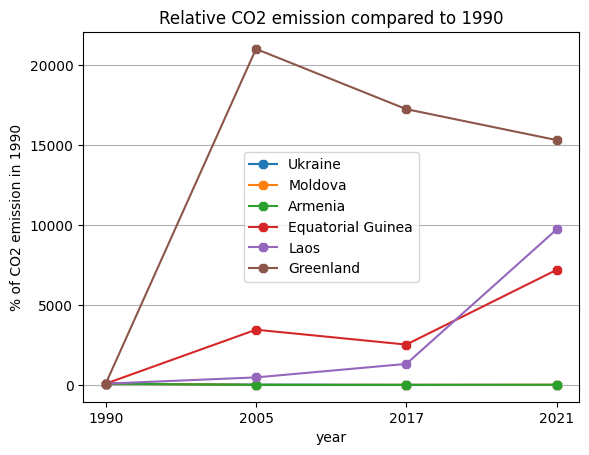

In [11]:
fig, ax = plt.subplots()
years = best_and_worst_changers.columns[1:5]
for index, row in best_and_worst_changers.iterrows():
  ax.plot(years, row[5:], label = row[0], marker = '8')
ax.set_title("Relative CO2 emission compared to 1990")
ax.set_xlabel('year')
ax.set_ylabel('% of CO2 emission in 1990')
ax.legend()
ax.grid(True, axis='y')

In [12]:
countries_at_least_5Mt_1990 = global_co2_countries.loc[global_co2_countries['1990'] >= 5.0]
countries_at_least_5Mt_1990 = countries_at_least_5Mt_1990.sort_values(by=['relative_co2_emission_2021_compared_to_1990'], ignore_index=True)
countries_at_least_5Mt_1990

,country,1990,2005,2017,2021,relative_co2_emission_1990,relative_co2_emission_2005_compared_to_1990,relative_co2_emission_2017_compared_to_1990,relative_co2_emission_2021_compared_to_1990
0,Ukraine,783.210,354.429,205.723,185.46,100.0,45.253380,26.266646,23.679473
1,Moldova,31.957,8.139,8.263,9.55,100.0,25.468598,25.856620,29.883906
2,Armenia,20.699,4.542,4.832,6.77,100.0,21.943089,23.344123,32.706894
3,Georgia,34.745,4.979,11.558,11.65,100.0,14.330119,33.265218,33.530004
4,Latvia,20.141,8.242,8.049,7.21,100.0,40.921503,39.963259,35.797627
...,...,...,...,...,...,...,...,...,...
99,China,2397.050,6263.060,10877.220,12466.32,100.0,261.281992,453.775265,520.069252
100,Qatar,16.291,43.435,97.787,97.69,100.0,266.619606,600.251673,599.656252
101,Bangladesh,13.868,38.834,84.546,106.87,100.0,280.025959,609.648111,770.623017
102,Oman,11.884,32.964,78.421,94.62,100.0,277.381353,659.887243,796.196567


In [13]:
best_and_worst_changers_at_least_5Mt_in_1990 = countries_at_least_5Mt_1990.iloc[[0,1,2,101,102,103]]
best_and_worst_changers_at_least_5Mt_in_1990

,country,1990,2005,2017,2021,relative_co2_emission_1990,relative_co2_emission_2005_compared_to_1990,relative_co2_emission_2017_compared_to_1990,relative_co2_emission_2021_compared_to_1990
0,Ukraine,783.210,354.429,205.723,185.46,100.0,45.253380,26.266646,23.679473
1,Moldova,31.957,8.139,8.263,9.55,100.0,25.468598,25.856620,29.883906
2,Armenia,20.699,4.542,4.832,6.77,100.0,21.943089,23.344123,32.706894
101,Bangladesh,13.868,38.834,84.546,106.87,100.0,280.025959,609.648111,770.623017
102,Oman,11.884,32.964,78.421,94.62,100.0,277.381353,659.887243,796.196567
103,Vietnam,20.182,99.231,218.729,321.41,100.0,491.680706,1083.782579,1592.557725


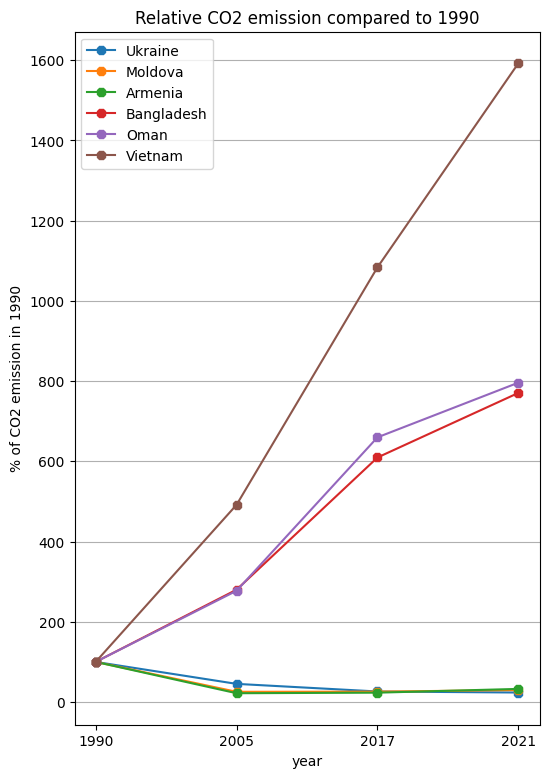

In [14]:
fig, ax = plt.subplots()
years = best_and_worst_changers_at_least_5Mt_in_1990.columns[1:5]
for index, row in best_and_worst_changers_at_least_5Mt_in_1990.iterrows():
  ax.plot(years, row[5:], label = row[0], marker = '8')
ax.set_title("Relative CO2 emission compared to 1990")
ax.set_xlabel('year')
ax.set_ylabel('% of CO2 emission in 1990')
ax.legend()
ax.grid(True, axis='y')
fig.set_size_inches(6,9)